<a href="https://colab.research.google.com/github/Hero0963/data_science_camp_level2/blob/main/task08/dscamp_lv2_task08_hw_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#練習：請根據給定的資料集，分成前 7 筆的訓練資料與後 3 筆的測試資料完成以下兩個分析：

* 利用 Country, Age, Salary 對 Purchased 進行分類學習，印出後三筆資料的 Purchased 為何  
* 利用 Country, Age, Purchased 對 Salary 進行迴歸學習，印出後三筆資料的 Salary 為何  

In [ ]:
import pandas as pd
import statsmodels.api as sm

url = 'https://raw.githubusercontent.com/MachineLearningLiuMing/scikit-learn-primer-guide/master/Data.csv'
df = pd.read_csv(url)
display(df)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
df['Purchased'] = df['Purchased'].map({'Yes': 1, 'No': 0})
display(df)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,0
1,Spain,27.0,48000.0,1
2,Germany,30.0,54000.0,0
3,Spain,38.0,61000.0,0
4,Germany,40.0,NaN,1
5,France,35.0,58000.0,1
6,Spain,NaN,52000.0,0
7,France,48.0,79000.0,1
8,Germany,50.0,83000.0,0
9,France,37.0,67000.0,1


In [ ]:
df_onehotencoded = pd.get_dummies(df, columns=['Country'])
display(df_onehotencoded)

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.0,72000.0,0,1,0,0
1,27.0,48000.0,1,0,0,1
2,30.0,54000.0,0,0,1,0
3,38.0,61000.0,0,0,0,1
4,40.0,NaN,1,0,1,0
5,35.0,58000.0,1,1,0,0
6,NaN,52000.0,0,0,0,1
7,48.0,79000.0,1,1,0,0
8,50.0,83000.0,0,0,1,0
9,37.0,67000.0,1,1,0,0


In [ ]:
df_onehotencoded['Age'].fillna(df_onehotencoded['Age'].mean(), inplace=True)
df_onehotencoded['Salary'].fillna(df_onehotencoded['Salary'].mean(), inplace=True)
df = df_onehotencoded
display(df)

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.000000,72000.000000,0,1,0,0
1,27.000000,48000.000000,1,0,0,1
2,30.000000,54000.000000,0,0,1,0
3,38.000000,61000.000000,0,0,0,1
4,40.000000,63777.777778,1,0,1,0
5,35.000000,58000.000000,1,1,0,0
6,38.777778,52000.000000,0,0,0,1
7,48.000000,79000.000000,1,1,0,0
8,50.000000,83000.000000,0,0,1,0
9,37.000000,67000.000000,1,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Purchased']), df['Purchased'], test_size=0.3, shuffle=False)

# 創建分類森林模型
clf_model = DecisionTreeClassifier()

# 訓練模型
clf_model.fit(X_train, y_train)

# 使用模型進行預測
y_pred_clf = clf_model.predict(X_test)
print(y_pred_clf)

[0 0 1]


In [ ]:
from sklearn import metrics
actual_values = y_test
predicted_values = y_pred_clf
accuracy = metrics.accuracy_score(actual_values, predicted_values)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


array([[1, 0],
       [1, 1]])

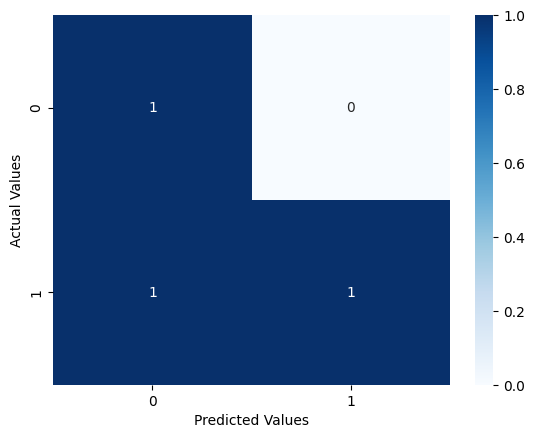

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 創建混淆矩陣
confusion_matrix = metrics.confusion_matrix(actual_values, predicted_values)
display(confusion_matrix)

# 繪製熱圖
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred_SVC = model.predict(X_test)
print(y_pred_SVC)

[0 0 0]


In [ ]:
actual_values = y_test
predicted_values = y_pred_SVC
accuracy = metrics.accuracy_score(actual_values, predicted_values)
print("Accuracy:", accuracy)

Accuracy: 0.3333333333333333


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred_LogisticRegression = classifier.predict(X_test)
print(y_pred_LogisticRegression)

[0 0 1]


In [ ]:
actual_values = y_test
predicted_values = y_pred_LogisticRegression
accuracy = metrics.accuracy_score(actual_values, predicted_values)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


In [ ]:
result = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred_clf), pd.Series(y_pred_SVC), pd.Series(y_pred_LogisticRegression),], axis=1)
result.columns = ['Actual', 'CLF', 'SVC', 'LogisticRegression',]
display(result)

,Actual,CLF,SVC,LogisticRegression
0,1,0,0,0
1,0,0,0,0
2,1,1,0,1


In [ ]:
display(df)

,Age,Salary,Purchased,Country_France,Country_Germany,Country_Spain
0,44.000000,72000.000000,0,1,0,0
1,27.000000,48000.000000,1,0,0,1
2,30.000000,54000.000000,0,0,1,0
3,38.000000,61000.000000,0,0,0,1
4,40.000000,63777.777778,1,0,1,0
5,35.000000,58000.000000,1,1,0,0
6,38.777778,52000.000000,0,0,0,1
7,48.000000,79000.000000,1,1,0,0
8,50.000000,83000.000000,0,0,1,0
9,37.000000,67000.000000,1,1,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Salary']), df['Salary'], test_size=0.3, shuffle=False)
print("X_train = ", X_train)
print("X_test = ", X_test)
print("y_train = ", y_train)
print("y_test = ", y_test)

X_train =           Age  Purchased  Country_France  Country_Germany  Country_Spain
0  44.000000          0               1                0              0
1  27.000000          1               0                0              1
2  30.000000          0               0                1              0
3  38.000000          0               0                0              1
4  40.000000          1               0                1              0
5  35.000000          1               1                0              0
6  38.777778          0               0                0              1
X_test =      Age  Purchased  Country_France  Country_Germany  Country_Spain
7  48.0          1               1                0              0
8  50.0          0               0                1              0
9  37.0          1               1                0              0
y_train =  0    72000.000000
1    48000.000000
2    54000.000000
3    61000.000000
4    63777.777778
5    58000.000000
6    52000.00000

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
# 創建迴歸模型
model_lr = linear_model.LinearRegression()

# 訓練模型
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
# 計算均方誤差
mse = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", mse)

Mean Squared Error: 50607258.58144436


In [ ]:
from sklearn.svm import SVR

# 創建支持向量迴歸模型
model_svr = SVR(kernel='rbf')

# 訓練模型
model_svr.fit(X_train, y_train)

# 進行預測
y_pred_svr = model_svr.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 創建決策樹迴歸模型
model_dr = DecisionTreeRegressor()

# 訓練模型
model_dr.fit(X_train, y_train)

# 進行預測
y_pred_dr = model_dr.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 創建隨機森林迴歸模型
model_rfr = RandomForestRegressor()

# 訓練模型
model_rfr.fit(X_train, y_train)

# 進行預測
y_pred_rfr = model_rfr.predict(X_test)

In [ ]:
result_r = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred_lr), pd.Series(y_pred_svr), pd.Series(y_pred_dr), pd.Series(y_pred_rfr)], axis=1)
result_r.columns = ['Actual', 'LR', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor']
display(result_r)

,Actual,LR,SVR,DecisionTreeRegressor,RandomForestRegressor
0,79000.0,72769.627475,58000.528711,63777.777778,66094.444444
1,83000.0,73458.793155,58000.578788,72000.000000,64684.444444
2,67000.0,62312.825384,58000.094038,58000.000000,58912.222222
